<a href="https://colab.research.google.com/github/RogerSchwartz/preditor-pre-o-de-casas-po-o-de-caldas/blob/main/preditor_pre%C3%A7o_de_casas_po%C3%A7o_de_caldas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import os
import tarfile
from six.moves import urllib
HOUSING_PATH = os.path.join("datasets", "data")

In [72]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "imoveis_pocos.csv")
    return pd.read_csv(csv_path)

In [73]:
housing = load_housing_data()
housing = housing[housing.iptu.notnull()]
housing = housing.reset_index(drop=True)
housing.head()

,valor,classe,dormitorios,banheiros,vagas_na_garagem,tipo_do_imovel,bairro,area_terreno,area_util,condominio,...,elevador_social,suites,apartamento_por_andar,quantidade_de_andares,elevador_de_servico,salao_de_festa,iptu,lat,long,dist_centro
0,600000.0,Apartamento,3.0,2.0,2.0,Padrão,centro,NaN,91.0,350.0,...,1.0,1.0,NaN,NaN,1.0,0.0,208.00,-21.788380,-46.566182,0.000000
1,600000.0,Apartamento,2.0,2.0,1.0,Padrão,centro,NaN,75.0,400.0,...,1.0,1.0,NaN,NaN,1.0,0.0,186.00,-21.788380,-46.566182,0.000000
2,265000.0,Apartamento,2.0,1.0,1.0,Padrão,vila togni,NaN,46.0,230.0,...,NaN,NaN,8.0,9.0,NaN,NaN,84.12,-21.780299,-46.597623,3.368500
3,140000.0,Apartamento,2.0,1.0,1.0,Padrão,dom bosco,NaN,47.0,162.0,...,NaN,NaN,4.0,4.0,NaN,NaN,35.00,-21.793968,-46.534471,3.332541
4,2200000.0,Casa,4.0,4.0,4.0,Padrão,jardim dos estados,703.0,574.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,250.00,-21.782685,-46.559694,0.921824


In [74]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   valor                  172 non-null    float64
 1   classe                 172 non-null    object 
 2   dormitorios            164 non-null    float64
 3   banheiros              168 non-null    float64
 4   vagas_na_garagem       154 non-null    float64
 5   tipo_do_imovel         172 non-null    object 
 6   bairro                 172 non-null    object 
 7   area_terreno           58 non-null     float64
 8   area_util              83 non-null     float64
 9   condominio             119 non-null    float64
 10  torres                 83 non-null     float64
 11  portaria_hrs           39 non-null     float64
 12  elevador_social        59 non-null     float64
 13  suites                 102 non-null    float64
 14  apartamento_por_andar  103 non-null    float64
 15  quanti

In [75]:
housing["classe"].value_counts()

Apartamento    118
Casa            45
Comercial        6
Terreno          3
Name: classe, dtype: int64

In [76]:
housing.describe()

,valor,dormitorios,banheiros,vagas_na_garagem,area_terreno,area_util,condominio,torres,portaria_hrs,elevador_social,suites,apartamento_por_andar,quantidade_de_andares,elevador_de_servico,salao_de_festa,iptu,lat,long,dist_centro
count,1.720000e+02,164.000000,168.000000,154.000000,58.000000,83.000000,119.000000,83.000000,39.000000,59.000000,102.000000,103.000000,102.000000,38.000000,25.0,172.000000,126.000000,126.000000,126.000000
mean,5.196860e+05,2.579268,1.952381,1.701299,1382.055172,112.767831,270.585462,2.277108,18.205128,1.084746,1.235294,3.252427,6.392157,1.026316,0.0,175.934012,-21.800490,-46.564274,2.406169
std,5.659085e+05,1.015129,1.251631,1.177845,7380.870697,101.052242,202.900872,3.178868,7.086605,0.280894,0.691912,1.913412,4.088518,0.162221,0.0,678.629161,0.024339,0.020292,2.783096
min,1.000000e+05,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.0,1.000000,-21.857558,-46.597623,0.000000
25%,2.500000e+05,2.000000,1.000000,1.000000,250.000000,60.000000,120.000000,1.000000,12.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.0,54.025000,-21.799574,-46.571666,0.000000
50%,3.500000e+05,2.000000,2.000000,1.000000,306.000000,82.000000,245.000000,1.000000,24.000000,1.000000,1.000000,3.000000,4.000000,1.000000,0.0,80.625000,-21.790743,-46.566182,1.034897
75%,5.800000e+05,3.000000,2.000000,2.000000,496.500000,120.500000,352.500000,1.500000,24.000000,1.000000,1.000000,4.000000,10.000000,1.000000,0.0,136.250000,-21.788380,-46.559694,3.326118
max,4.999999e+06,10.000000,10.000000,8.000000,56580.000000,574.000000,1200.000000,19.000000,24.000000,2.000000,5.000000,12.000000,17.000000,2.000000,0.0,8000.000000,-21.702056,-46.476850,12.976763


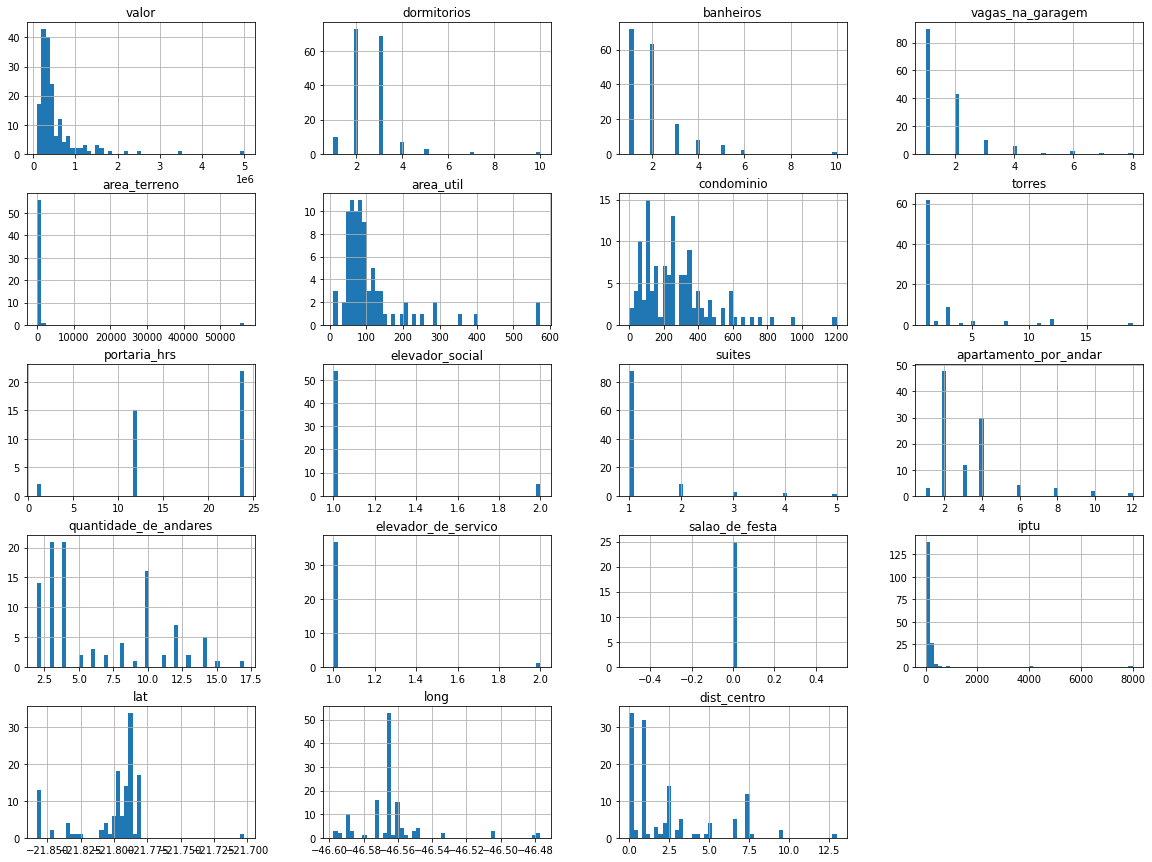

In [77]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [78]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [79]:
train_set, test_set = split_train_test(housing, 0.2)

In [80]:
len(train_set)

138

In [81]:
len(test_set)

34

In [82]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [83]:
len(train_set)

137

In [84]:
len(test_set)

35

In [85]:
corr_matrix = housing.corr()
corr_matrix["valor"].sort_values(ascending=False)

valor                    1.000000
area_util                0.870219
banheiros                0.758850
vagas_na_garagem         0.745676
condominio               0.729820
dormitorios              0.719335
iptu                     0.708666
area_terreno             0.676544
suites                   0.644262
quantidade_de_andares    0.597944
portaria_hrs             0.195412
elevador_de_servico      0.127911
lat                      0.095188
elevador_social          0.074186
long                    -0.011442
dist_centro             -0.157789
apartamento_por_andar   -0.177865
torres                  -0.235713
salao_de_festa                NaN
Name: valor, dtype: float64

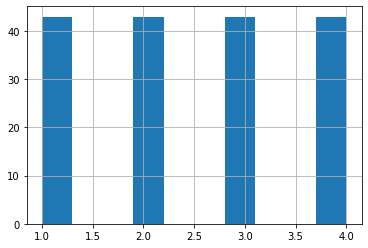

In [91]:
housing["income_cat"] = pd.cut(housing["iptu"],
 bins=[0., 54.025000, 80.625000, 136.250000, 8000.000000, np.inf],
 labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()



In [87]:
import itertools
import pandas as pd
from datetime import datetime

dt = datetime.now()
housing.to_csv(str(dt)+'.csv')

In [88]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [89]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

1    0.257143
3    0.257143
4    0.257143
2    0.228571
5    0.000000
Name: income_cat, dtype: float64